In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt

from statistics import mode
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
    f1_score, roc_auc_score

from utils import *

In [13]:
# Rutas de los datos
ruta_entrenamiento = os.getcwd() + "/db/KDDTrain+.arff"
ruta_prueba = os.getcwd() + "/db/KDDTest+.arff"
ruta_entrenamiento, ruta_prueba

('c:\\Users\\seelro06\\OneDrive - Arca Continental S.A.B. de C.V\\Documentos\\uni\\cybersecurity-ml-analysis/db/KDDTrain+.arff',
 'c:\\Users\\seelro06\\OneDrive - Arca Continental S.A.B. de C.V\\Documentos\\uni\\cybersecurity-ml-analysis/db/KDDTest+.arff')

In [15]:
X_entrenamiento, y_entrenamiento = procesar_datos_entrada(ruta_entrenamiento)
X_prueba, y_prueba = procesar_datos_entrada(ruta_prueba)

print("Dimensiones de las características de entrenamiento:",
    X_entrenamiento.shape)
print("Dimensiones de las características de prueba:", X_prueba.shape)

Dimensiones de las características de entrenamiento: (125973, 41)
Dimensiones de las características de prueba: (22544, 41)


In [16]:
preprocesador = obtener_preprocesador(X_entrenamiento)
X_escala = preprocesador.fit_transform(X_entrenamiento)

In [17]:
k = len(y_entrenamiento.unique())
kmeans2 = KMeans(n_clusters=k, random_state=42)
kmeans2.fit(X_escala)

KMeans(n_clusters=2, random_state=42)

In [18]:
kmeans2.labels_

array([0, 0, 1, ..., 0, 1, 0])

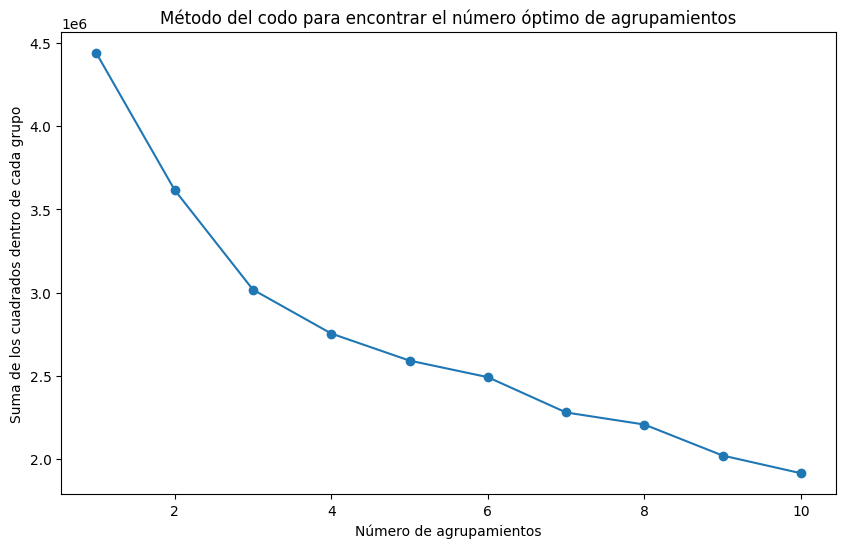

In [19]:
# Evaluar el agrupamiento con el método del codo
def metodo_codo(X):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300,
            n_init=10, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), wcss, marker='o')
    plt.title('Método del codo para encontrar el número óptimo de agrupamientos')
    plt.xlabel('Número de agrupamientos')
    plt.ylabel('Suma de los cuadrados dentro de cada grupo')
    plt.show()

# Ejecutar el método del codo
metodo_codo(X_escala)

In [20]:
# K Means seleccionado (4 agrupamientos)
kmeans3 = KMeans(n_clusters=3, random_state=42)
kmeans3.fit(X_escala)

KMeans(n_clusters=3, random_state=42)

In [21]:
def asignar_etiquetas(y_pred, y_verdadero):
    etiquetas_verdaderas = {}
    for etiqueta in np.unique(y_pred):
        indices_etiqueta = y_pred == etiqueta
        etiqueta_verdadera = mode(y_verdadero[indices_etiqueta])
        etiquetas_verdaderas[etiqueta] = etiqueta_verdadera
    return np.array([etiquetas_verdaderas[etiqueta] for etiqueta in y_pred])

X_prueba_escala = preprocesador.transform(X_prueba)
y_agrupamiento2 = kmeans2.predict(X_prueba_escala)
y_agrupamiento2 = asignar_etiquetas(y_agrupamiento2, y_prueba)
y_agrupamiento2

array([1, 1, 1, ..., 1, 1, 1])

In [22]:
y_agrupamiento3 = kmeans3.predict(X_prueba_escala)
y_agrupamiento3 = asignar_etiquetas(y_agrupamiento3, y_prueba)
y_agrupamiento3

array([1, 1, 1, ..., 1, 1, 1])

In [25]:
# Cargar predicciones del modelo de clasificación
y_clasificacion = pd.read_csv('db/resultados_clasificacion.csv',
    header=None)[0].values
y_clasificacion

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [26]:
def evaluar_metricas(y_verdadero, y_pred):
    exactitud = accuracy_score(y_verdadero, y_pred)
    precision = precision_score(y_verdadero, y_pred)
    sensibilidad = recall_score(y_verdadero, y_pred)
    f1 = f1_score(y_verdadero, y_pred)
    area_roc = roc_auc_score(y_verdadero, y_pred)

    print(f"Exactitud en los datos de prueba: {exactitud:.4f}")
    print(f"Precisión en los datos de prueba: {precision:.4f}")
    print(f"Sensibilidad en los datos de prueba: {sensibilidad:.4f}")
    print(f"Métrica F1 en los datos de prueba: {f1:.4f}")
    print(f"Área bajo la curva ROC en los datos de prueba: {area_roc:.4f}")
    print()

print("KMeans (2 agrupamientos):")
print(evaluar_metricas(y_prueba, y_agrupamiento2))

print("KMeans (3 agrupamientos):")
print(evaluar_metricas(y_prueba, y_agrupamiento3))

print("Modelo de clasificación:")
print(evaluar_metricas(y_prueba, y_clasificacion))

KMeans (2 agrupamientos):
Exactitud en los datos de prueba: 0.5692
Precisión en los datos de prueba: 0.5692
Sensibilidad en los datos de prueba: 1.0000
Métrica F1 en los datos de prueba: 0.7255
Área bajo la curva ROC en los datos de prueba: 0.5000

None
KMeans (3 agrupamientos):
Exactitud en los datos de prueba: 0.5692
Precisión en los datos de prueba: 0.5692
Sensibilidad en los datos de prueba: 1.0000
Métrica F1 en los datos de prueba: 0.7255
Área bajo la curva ROC en los datos de prueba: 0.5000

None
Modelo de clasificación:
Exactitud en los datos de prueba: 0.8038
Precisión en los datos de prueba: 0.9687
Sensibilidad en los datos de prueba: 0.6772
Métrica F1 en los datos de prueba: 0.7971
Área bajo la curva ROC en los datos de prueba: 0.8241

None
